# Ejercicio 1

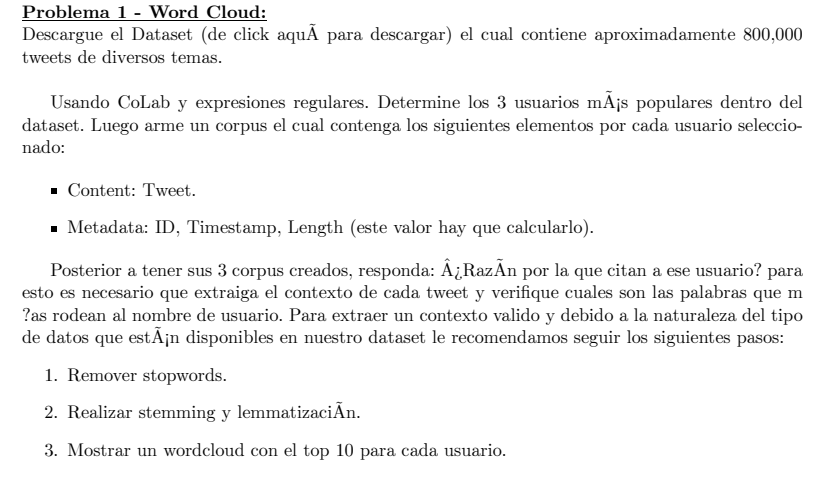

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Text Mining & Image Recognition Proyecto/Parte 1/tw_source.csv', encoding='latin_1',header=None)
dataset.columns= ['valor','id','fecha','fuente','usuario','tweet']
dataset

,valor,id,fecha,fuente,usuario,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
# se pasa todo el dataset a la variable df
df=dataset
df

,valor,id,fecha,fuente,usuario,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
#Conocer el tipo de variables
df.dtypes

valor       int64
id          int64
fecha      object
fuente     object
usuario    object
tweet      object
dtype: object

In [ ]:
# obtenemos el largo del tweet
df['Length'] = df['tweet'].str.len()
df.head(10)

,valor,id,fecha,fuente,usuario,tweet,Length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,11
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,99
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,36
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,25


In [ ]:
print(type(df.index[0]))  # Esto te dirá el tipo de dato de tu índice


<class 'int'>


In [ ]:
#Permite conocer los tweet de miley cyrus
#filas_per_at['@mileycyrus']

In [ ]:
contador_menciones =Counter(lista_menciones)
Counter(lista_menciones).most_common(10)[1:]
usuarios_mas_mencionados=Counter(lista_menciones).most_common(10)[1:]
usuarios_mas_mencionados

[('@mileycyrus', 4310),
 ('@tommcfly', 3837),
 ('@ddlovato', 3349),
 ('@Jonasbrothers', 1263),
 ('@DavidArchie', 1222),
 ('@jordanknight', 1105),
 ('@DonnieWahlberg', 1085),
 ('@JonathanRKnight', 1053),
 ('@mitchelmusso', 1038)]

In [ ]:
filas_mileycyrus = filas_per_at['@mileycyrus']
filas_tommcfly = filas_per_at['@tommcfly']
filas_ddlovato = filas_per_at['@ddlovato']


In [ ]:
# Generación de corpus para cada usuario más mencionado
corpus_mileycyrus = df.iloc[filas_mileycyrus,[2,5,6]].reset_index()
corpus_tommcfly  = df.iloc[filas_tommcfly,[2,5,6]].reset_index()
corpus_ddlovato   = df.iloc[filas_ddlovato,[2,5,6]].reset_index()


## Muestra de los corpus para los 3 usuarios más mencionados

In [ ]:
# Conocer el corpus de mileycyrus
corpus_mileycyrus

In [ ]:
# Conocer el corpus de tommcfly
corpus_tommcfly

In [ ]:
# Conocer el corpus de ddlovato
corpus_ddlovato

# NLP Pipeline

In [ ]:
def limpiar_texto(texto):
    # Reemplaza los apóstrofos por nada (elimina los apóstrofos)
    texto_limpio = re.sub(r"'", '', texto)
    return texto_limpio

In [ ]:
#Proceso de tokenización (aunque se usará mejor el apply ya que funciona de igualmanera)
def tokenizacion(documentos):
  df['tokenizado'] = df['tweet'].apply(word_tokenize)

In [ ]:
def normalizacion_texto(documentos):
  new_corpus = []
  for doc in documentos:
    new_corpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúÁÉÍÓÚ]'
, '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
  return new_corpus

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


def procesamiento(documentos):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Asegúrate de haber descargado los stopwords de nltk

    # Asumiendo que "documentos" es una lista de strings
    corpus = []
    for doc in documentos:
        tokens = [word for word in doc.split() if word.lower() not in stop_words]
        lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
        stemmed = [stemmer.stem(word) for word in lemmatized]
        corpus.append(stemmed)

    return corpus


In [ ]:
corpus_ddlovato.head()

,index,fecha,tweet,Length
0,573,Mon Apr 06 22:58:30 PDT 2009,@ddlovato Do you hate us?? Please don't,40
1,7032,Tue Apr 07 07:02:58 PDT 2009,@ddlovato Wish that i could see it.. Thats th...,96
2,7089,Tue Apr 07 07:05:11 PDT 2009,"@ddlovato hey demi, wen are you and selena gon...",79
3,8611,Fri Apr 17 20:31:31 PDT 2009,@ddlovato ahhhh i wish i could go to the dalla...,85
4,9492,Fri Apr 17 21:56:12 PDT 2009,@ddlovato I just saw your tour dates and now I...,116


In [ ]:
corpus_mileycyrus['tweet_1'] = corpus_mileycyrus['tweet'].apply(limpiar_texto)
corpus_tommcfly['tweet_1'] = corpus_tommcfly['tweet'].apply(limpiar_texto)
corpus_ddlovato['tweet_1'] = corpus_ddlovato['tweet'].apply(limpiar_texto)


In [ ]:
corpus_mileycyrus[corpus_mileycyrus['tweet'].str.contains(r"n't", na=False)] # se eliminaron apóstrofos

,index,fecha,tweet,Length,tweet_1
2,2073,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72,@mileycyrus I guess counting sheep didnt work ...
29,14233,Sat Apr 18 14:43:38 PDT 2009,@mileycyrus that's so cool - but i won't be ab...,135,@mileycyrus thats so cool - but i wont be able...
33,16272,Sat Apr 18 20:51:40 PDT 2009,@mileycyrus .......i know wat it's like leavin...,78,@mileycyrus .......i know wat its like leavin ...
35,18787,Sat Apr 18 23:54:18 PDT 2009,@mileycyrus http://twitpic.com/3goxn - WOAH! i...,112,@mileycyrus http://twitpic.com/3goxn - WOAH! i...
40,28010,Sun Apr 19 11:14:38 PDT 2009,@mileycyrus don't leave us haha i'm part of y...,138,@mileycyrus dont leave us haha im part of you...
...,...,...,...,...,...
4040,1565758,Mon Jun 15 20:33:02 PDT 2009,@mileycyrus What brings you to Savannah? I lov...,135,@mileycyrus What brings you to Savannah? I lov...
4052,1570487,Mon Jun 15 22:11:38 PDT 2009,@mileycyrus AWWW! Miley you are so cute! Dave ...,135,@mileycyrus AWWW! Miley you are so cute! Dave ...
4058,1571615,Mon Jun 15 22:35:32 PDT 2009,"@mileycyrus When i text u, it means i am missi...",127,"@mileycyrus When i text u, it means i am missi..."
4090,1586945,Tue Jun 16 03:57:27 PDT 2009,@mileycyrus When will we get to hear the &quot...,88,@mileycyrus When will we get to hear the &quot...


In [ ]:
corpus_mileycyrus.head()

,index,fecha,tweet,Length,tweet_1
0,1021,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...,107,@mileycyrus hahaha dont be like that one time ...
1,2014,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ...",137,"@mileycyrus i have the same problem, but its 4..."
2,2073,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72,@mileycyrus I guess counting sheep didnt work ...
3,2080,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...,100,@mileycyrus I would too if it meant spending a...
4,2156,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...,112,@mileycyrus AWWW u seriously have the cutest d...


In [ ]:
corpus_mileycyrus['tweet_1'] = corpus_mileycyrus['tweet_1'].apply(word_tokenize)
corpus_tommcfly['tweet_1'] = corpus_tommcfly['tweet_1'].apply(word_tokenize)
corpus_ddlovato['tweet_1'] = corpus_ddlovato['tweet_1'].apply(word_tokenize)

In [ ]:
corpus_mileycyrus.head()

,index,fecha,tweet,Length,tweet_1,Procesado
0,1021,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...,107,"[@, mileycyrus, hahaha, dont, be, like, that, ...","[[], [mileycyru], [hahaha], [dont], [], [like]..."
1,2014,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ...",137,"[@, mileycyrus, i, have, the, same, problem, ,...","[[], [mileycyru], [], [], [], [], [problem], [..."
2,2073,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72,"[@, mileycyrus, I, guess, counting, sheep, did...","[[], [mileycyru], [], [guess], [count], [sheep..."
3,2080,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...,100,"[@, mileycyrus, I, would, too, if, it, meant, ...","[[], [mileycyru], [], [would], [], [], [], [me..."
4,2156,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...,112,"[@, mileycyrus, AWWW, u, seriously, have, the,...","[[], [mileycyru], [awww], [u], [serious], [], ..."


Con el proceso anterior, se tokenizaron los comentarios de cada corpus

In [ ]:
corpus_mileycyrus['tweet_1'] = corpus_mileycyrus['tweet_1'].apply(normalizacion_texto)
corpus_tommcfly['tweet_1'] = corpus_tommcfly['tweet_1'].apply(normalizacion_texto)
corpus_ddlovato['tweet_1'] = corpus_ddlovato['tweet_1'].apply(normalizacion_texto)

In [ ]:
corpus_mileycyrus.head()

,index,fecha,tweet,Length,tweet_1,Procesado
0,1021,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...,107,"[, mileycyrus, hahaha, dont, be, like, that, o...","[[], [mileycyru], [hahaha], [dont], [], [like]..."
1,2014,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ...",137,"[, mileycyrus, i, have, the, same, problem, , ...","[[], [mileycyru], [], [], [], [], [problem], [..."
2,2073,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72,"[, mileycyrus, i, guess, counting, sheep, didn...","[[], [mileycyru], [], [guess], [count], [sheep..."
3,2080,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...,100,"[, mileycyrus, i, would, too, if, it, meant, s...","[[], [mileycyru], [], [would], [], [], [], [me..."
4,2156,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...,112,"[, mileycyrus, awww, u, seriously, have, the, ...","[[], [mileycyru], [awww], [u], [serious], [], ..."


Se eliminaron de los 3 corpus números, se colocó en minúsculas y símbolo, siempre sobre la misma columna tweet_1

In [ ]:
corpus_mileycyrus['Procesado'] = corpus_mileycyrus['tweet_1'].apply(procesamiento)
corpus_tommcfly['Procesado'] = corpus_tommcfly['tweet_1'].apply(procesamiento)
corpus_ddlovato['Procesado'] = corpus_ddlovato['tweet_1'].apply(procesamiento)


In [ ]:
corpus_mileycyrus.head()

,index,fecha,tweet,Length,tweet_1,Procesado
0,1021,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...,107,"[, mileycyrus, hahaha, dont, be, like, that, o...","[[], [mileycyru], [hahaha], [dont], [], [like]..."
1,2014,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ...",137,"[, mileycyrus, i, have, the, same, problem, , ...","[[], [mileycyru], [], [], [], [], [problem], [..."
2,2073,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72,"[, mileycyrus, i, guess, counting, sheep, didn...","[[], [mileycyru], [], [guess], [count], [sheep..."
3,2080,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...,100,"[, mileycyrus, i, would, too, if, it, meant, s...","[[], [mileycyru], [], [would], [], [], [], [me..."
4,2156,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...,112,"[, mileycyrus, awww, u, seriously, have, the, ...","[[], [mileycyru], [awww], [u], [serious], [], ..."


# WORDCLOUD

In [ ]:
def generar_palabras(corpus, columna='Procesado', top_n=10): #se obtienen las top 10 palabras más utilizadas de la columna procesada
    all_words = [word for tweet in corpus[columna] for word_list in tweet if isinstance(word_list, list) for word in word_list]
    word_freq = Counter(all_words) # se genera un contador de frecuencia
    most_common_words = word_freq.most_common(top_n) # se realiza una lista de las top palabras
    common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency']) # se hace un df de las palabras y su frecuencia
    return common_words_df[1:] # se elimina la primera palabra  porque generalmente es el usuario de la persona a la que pertenece el corpus


In [ ]:
def generar_wordcloud(common_words_df):

  d = dict(zip(common_words_df['Word'], common_words_df['Frequency'])) # se utiliza como diccionario las palabras y la frecuencia
  text = " ".join(d)
  wc = WordCloud(width=800, height=400, background_color='white').generate(text) #se realiza el gráfico de wordcloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()


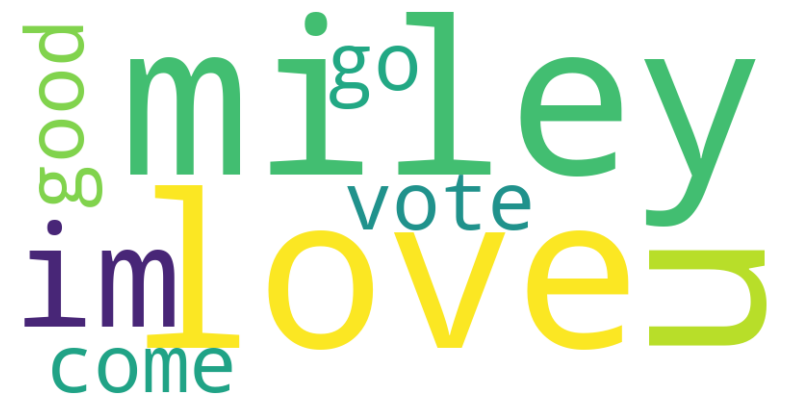

In [ ]:
common_words_df = generar_palabras(corpus_mileycyrus, columna='Procesado', top_n=10)

generar_wordcloud(common_words_df)

In [ ]:
common_words_df

,Word,Frequency
1,miley,838
2,love,814
3,u,658
4,im,535
5,http,530
6,vote,428
7,come,313
8,good,311
9,go,286


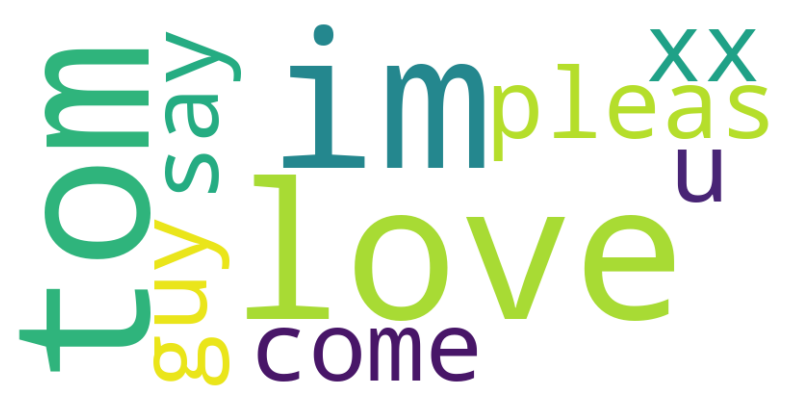

In [ ]:
common_words_df = generar_palabras(corpus_tommcfly, columna='Procesado', top_n=10)

generar_wordcloud(common_words_df)

In [ ]:
common_words_df

,Word,Frequency
1,tom,688
2,love,460
3,im,447
4,pleas,440
5,u,424
6,come,334
7,say,298
8,xx,287
9,guy,271


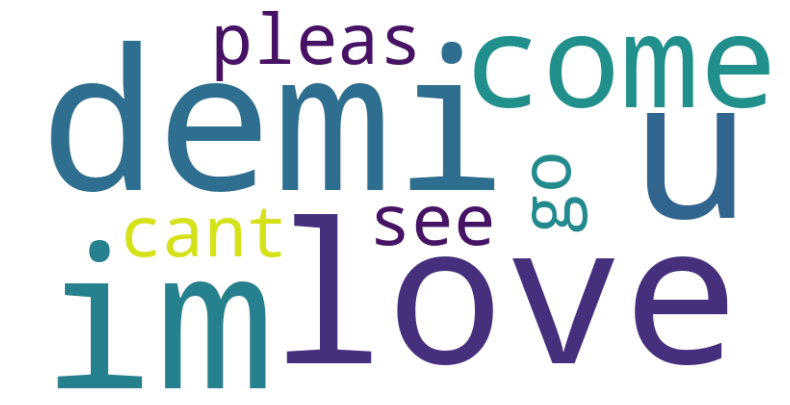

In [ ]:
common_words_df = generar_palabras(corpus_ddlovato, columna='Procesado', top_n=10)
generar_wordcloud(common_words_df)

In [ ]:
common_words_df

,Word,Frequency
1,love,590
2,demi,580
3,im,495
4,u,473
5,come,319
6,pleas,292
7,go,285
8,cant,282
9,see,244
